In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


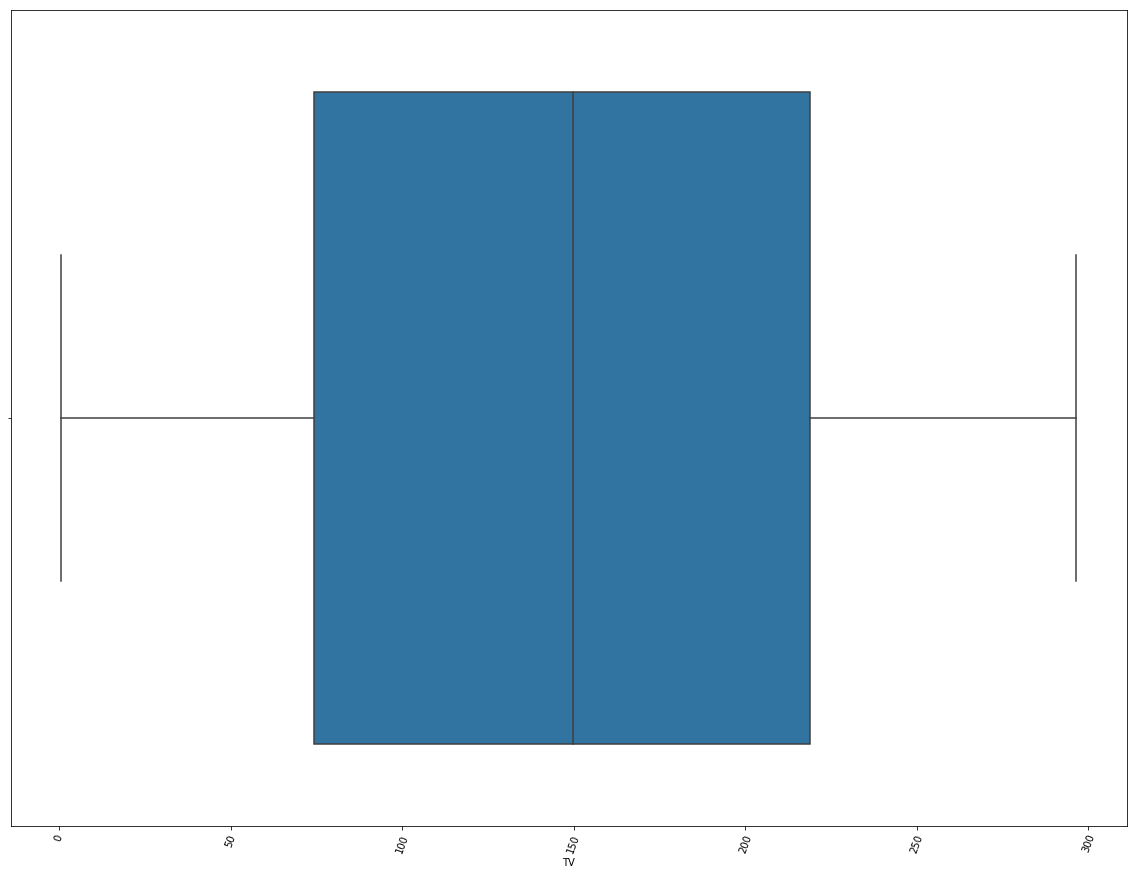

In [3]:
plt.figure(figsize=(20,15))
sns.boxplot(x="TV", data=data)
plt.xticks(rotation=70)
plt.show()

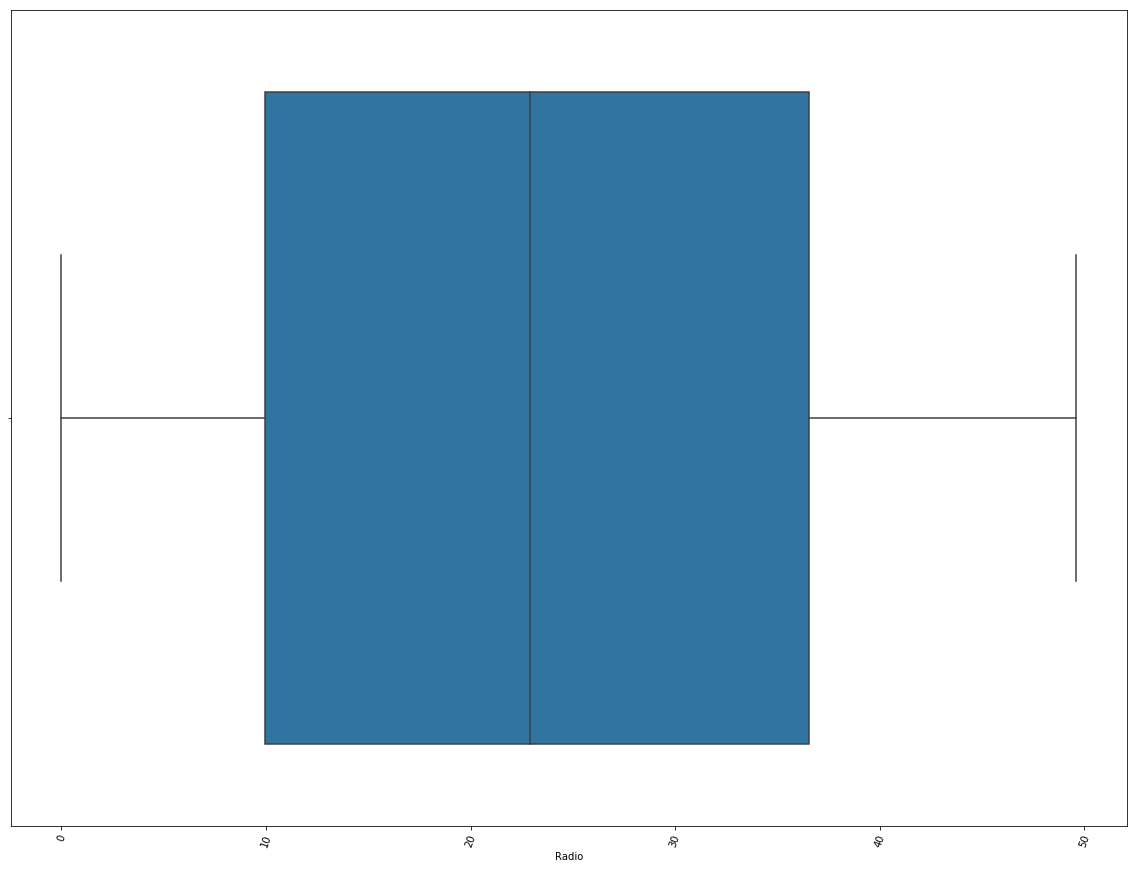

In [4]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Radio", data=data)
plt.xticks(rotation=70)
plt.show()

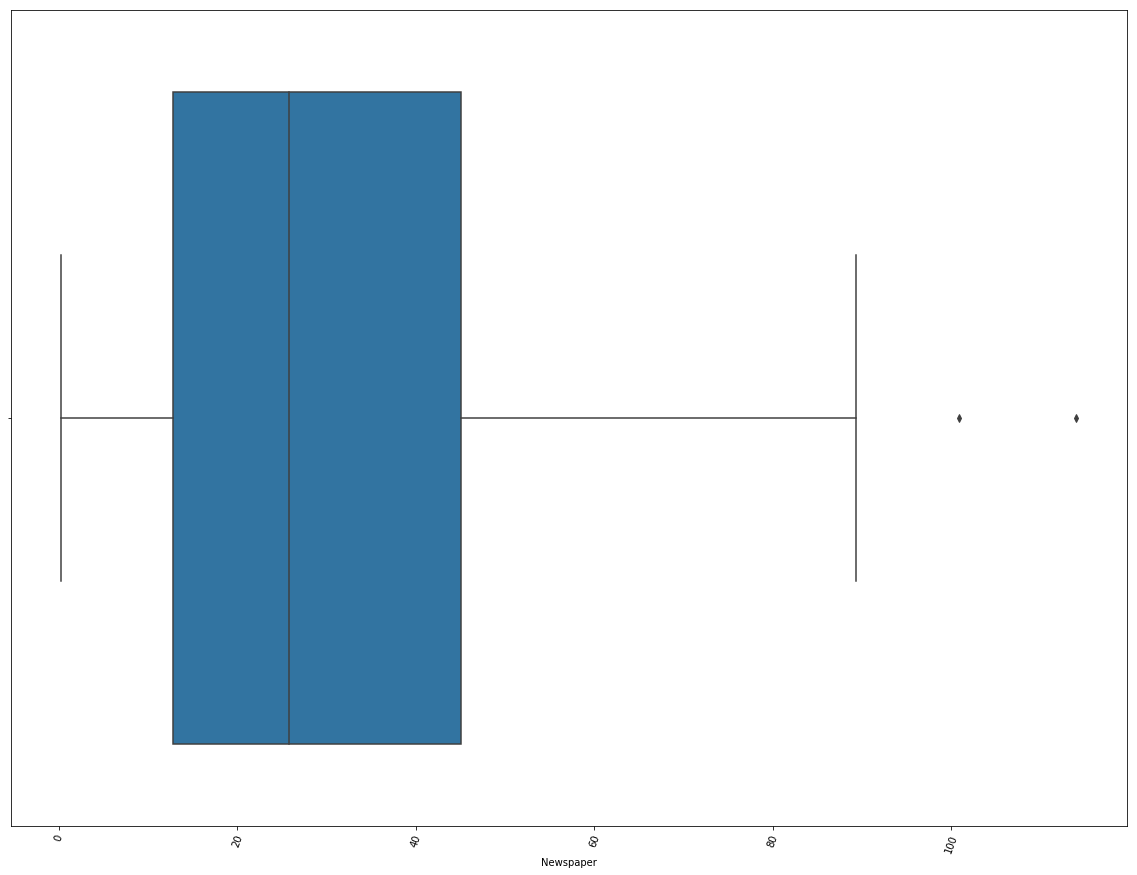

In [5]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Newspaper", data=data)
plt.xticks(rotation=70)
plt.show()

In [6]:
# remove values over 100 in Newspaper
data = data[data['Newspaper'] < 100]

In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [8]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04569034  0.18855047 -0.00117766]]

Intercept: 
 [2.95230857]

R-squared:
0.8953917183024752


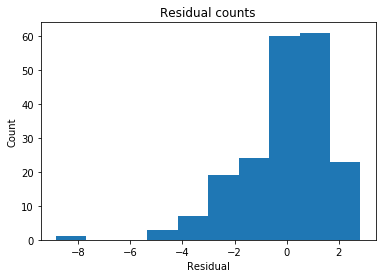

In [9]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [10]:
data['Residual_2'] = residual

In [11]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Residual_2
0,1,230.100,37.800,69.200,22.100,1.589
1,2,44.500,39.300,45.100,10.400,-1.942
2,3,17.200,45.900,69.300,9.300,-3.011
3,4,151.500,41.300,58.500,18.500,0.907
4,5,180.800,10.800,58.400,12.900,-0.281


In [12]:
data = data[data['Residual_2'] > -7]

In [13]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.0447505   0.19398861 -0.00470283]]

Intercept: 
 [3.11575831]

R-squared:
0.9079986661905504


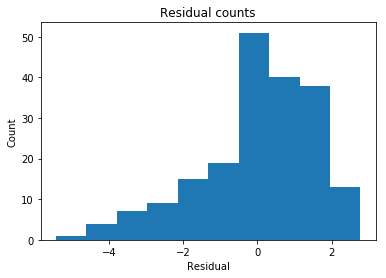

In [14]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [19]:
data['Sales_2'] = np.log(data['Sales'])

In [20]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales_2'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.00350065  0.01286637 -0.00030347]]

Intercept: 
 [1.76817613]

R-squared:
0.8748931906142495


In [24]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales_2']

# Calculate the error, also called the residual.
residual = actual - predicted

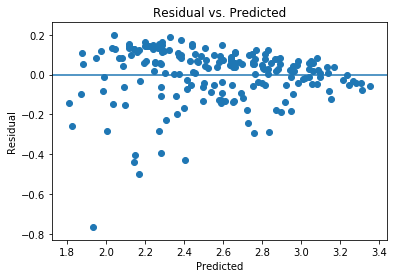

In [23]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Fixed heteroscedasticity